#**<font color="darkslateblue">MÓDULO 04** - Análise e Previsão de Séries Temporais

##<font color="hotpink">**Aula 01. Série Temporal**

In [ ]:
# pmdarima não vem no google colab instalado. Então é necessário instalar para poder importar o auto_arima

!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.4MB/s 
     |████████████████████████████████| 2.1MB 16.1MB/s 
     |████████████████████████████████| 9.5MB 28.9MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
## Importação das bibliotecas que poderão ser usadas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from fbprophet import Prophet

In [ ]:
! pip install --upgrade statsmodels

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.12.2)


In [ ]:
# Dados de casos confirmados de tuberculose no Brasil de 2001 a 2019.

url = "https://raw.githubusercontent.com/letpires/bootcamp_alura/main/modulo_04/datasets/casos_tuberculose_2001_2019.csv"

dados=pd.read_csv(url, encoding = "ISO-8859-1", sep=";",
                  skiprows=3, skipfooter=16, engine="python")

dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [ ]:
dados.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672,86207
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020,90291
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900,94354
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220,96005
19,Total,142969,129386,149875,143199,143264,133444,141800,149952,140241,144870,136864,128893,1684757


In [ ]:
#Limpeza de colunas e linhas que não serão necessárias para a análise. Ex: Total.

dados.drop("Total", axis=1, inplace=True)
dados.drop(19, inplace=True)
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541


###<font color="darkturquoise"> **Desafio 01: Transformar os dados em uma série temporal Ano-mês**

In [ ]:
# Fazer uma cópia do dataframe para não influenciar nas próximas aulas

dados2 = dados.copy()
dados2.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
14,2015,7111,6160,7833,6880,6893,6916,7531,7463,7189,7345,7287,6844
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220


**Para realizar esse desafio, será criada uma função para unir os meses (coluna) com os anos (linha):**

In [ ]:
def transforma_para_serie_temporal(df):

    # renomear as colunas
  meses = {"Jan": 1, "Fev": 2, "Mar": 3, "Abr": 4, "Mai": 5, "Jun": 6,
           "Jul": 7, "Ago": 8, "Set": 9, "Out": 10, "Nov": 11, "Dez": 12}

  df = df.rename(columns=meses)

  # colocando os anos como índice
  df = df.set_index("Ano Diagnóstico")

  # coletandos os valores dos anos e dos meses
  anos = df.index
  meses = df.columns

  # criando uma lista com "mes-ano"
  datas = []
  for ano in anos:
    for mes in meses:
     data = (f"{mes}-{ano}")
     datas.append(data)

  # pegando os números de casos e colocando numa lista
  casos = df.stack().values

  # criar um novo df com 2 colunas (período e casos)
  df_serie = pd.DataFrame({"data": datas, "casos": casos})

  # converter a coluna "periodo" np tipo datetime
  df_serie["data"] = pd.to_datetime(df_serie["data"])

  return df_serie

In [ ]:
dados_st_tuberculose= transforma_para_serie_temporal (dados2)
dados_st_tuberculose

,data,casos
0,2001-01-01,8088
1,2001-02-01,6542
2,2001-03-01,8095
3,2001-04-01,7305
4,2001-05-01,7656
...,...,...
223,2019-08-01,8239
224,2019-09-01,8143
225,2019-10-01,8592
226,2019-11-01,7615


In [ ]:
dados_st_tuberculose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    228 non-null    datetime64[ns]
 1   casos   228 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.7 KB


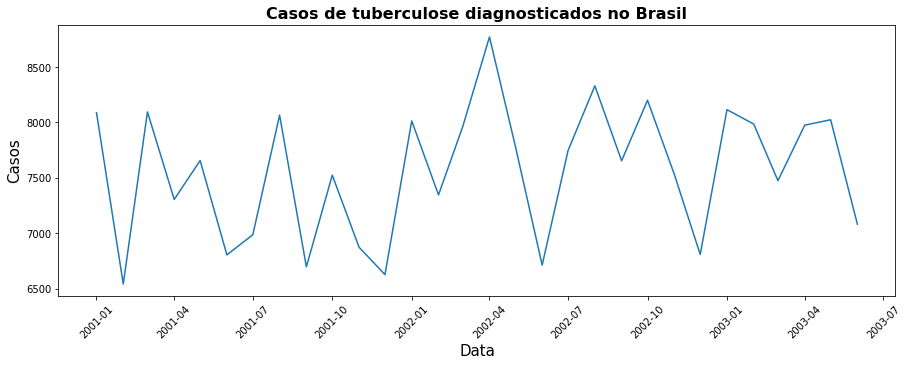

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x="data", y="casos", data=dados_st_tuberculose[:30])

plt.title("Casos de tuberculose diagnosticados no Brasil", fontsize=16, fontweight = "bold")
plt.ylabel("Casos", fontsize=15)
plt.xlabel("Data", fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Criando um gráfico interativo

fig = px.line(data_frame=dados_st_tuberculose,x="data",y="casos",title="Série Temporal Tuberculose")
fig.show()

###Continuação da aula...

In [ ]:
dados_st = dados.melt(id_vars="Ano Diagnóstico", value_name="Casos", var_name="Mês")
dados_st

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [ ]:
dados_st["Data"] = dados_st["Ano Diagnóstico"]+"-"+ dados_st["Mês"]
dados_st 

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


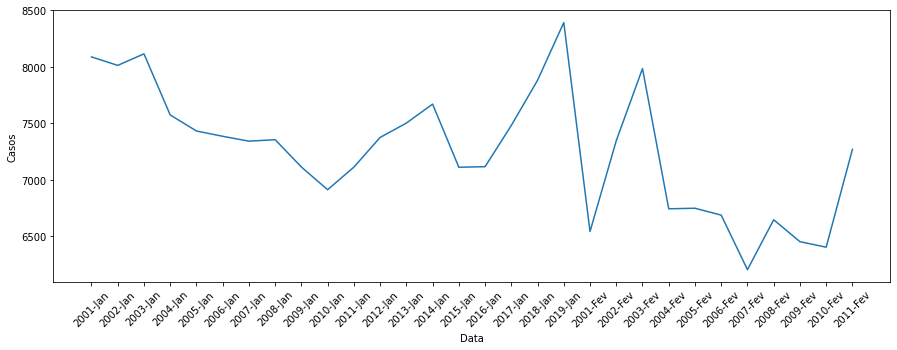

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Data", y="Casos", data=dados_st[:30])
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Está tratando Data como uma string (object) e não data
 
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    object
 1   Mês              228 non-null    object
 2   Casos            228 non-null    int64 
 3   Data             228 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


###<font color="darkturquoise"> **Desafio 02: Converter Data (string) em Datetime.**

In [ ]:
#Fazer um cópia dos dados para não interferir na continuação da aula

dados3 = dados_st.copy()
dados3

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


In [ ]:
 # Colocando nomes dos meses para número

meses_ing = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}


In [ ]:
# Substituindo os meses pelo dicionário ("Jan" por "1", etc)

dados3["Mês"] = dados3["Mês"].map(meses_ing)
dados3

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dez
224,2016,Dec,6672,2016-Dez
225,2017,Dec,7020,2017-Dez
226,2018,Dec,6900,2018-Dez


In [ ]:
dados3["Data"] = dados3["Ano Diagnóstico"]+"-"+ dados3["Mês"]
dados3

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dec
224,2016,Dec,6672,2016-Dec
225,2017,Dec,7020,2017-Dec
226,2018,Dec,6900,2018-Dec


In [ ]:
dados3["Data"] = pd.to_datetime(dados3["Data"])
dados3

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-01-01
1,2002,Jan,8013,2002-01-01
2,2003,Jan,8115,2003-01-01
3,2004,Jan,7574,2004-01-01
4,2005,Jan,7432,2005-01-01
...,...,...,...,...
223,2015,Dec,6844,2015-12-01
224,2016,Dec,6672,2016-12-01
225,2017,Dec,7020,2017-12-01
226,2018,Dec,6900,2018-12-01


In [ ]:
dados3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    object        
 1   Mês              228 non-null    object        
 2   Casos            228 non-null    int64         
 3   Data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.2+ KB


In [ ]:
dados3=dados3[["Casos","Data"]]
dados3

,Casos,Data
0,8088,2001-01-01
1,8013,2002-01-01
2,8115,2003-01-01
3,7574,2004-01-01
4,7432,2005-01-01
...,...,...
223,6844,2015-12-01
224,6672,2016-12-01
225,7020,2017-12-01
226,6900,2018-12-01


##<font color="hotpink">**Aula 02. Manipulação de datas**

In [ ]:
dados_st


,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


In [ ]:
meses_port_ing = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}

dados_st["Mês"] = dados_st["Mês"].map(meses_port_ing)
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dez
224,2016,Dec,6672,2016-Dez
225,2017,Dec,7020,2017-Dez
226,2018,Dec,6900,2018-Dez


In [ ]:
dados_st["Data"] = dados_st["Ano Diagnóstico"]+"-"+ dados_st["Mês"]
dados_st 

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dec
224,2016,Dec,6672,2016-Dec
225,2017,Dec,7020,2017-Dec
226,2018,Dec,6900,2018-Dec


In [ ]:
dados_st["Data"] = pd.to_datetime(dados_st["Data"])
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-01-01
1,2002,Jan,8013,2002-01-01
2,2003,Jan,8115,2003-01-01
3,2004,Jan,7574,2004-01-01
4,2005,Jan,7432,2005-01-01
...,...,...,...,...
223,2015,Dec,6844,2015-12-01
224,2016,Dec,6672,2016-12-01
225,2017,Dec,7020,2017-12-01
226,2018,Dec,6900,2018-12-01


In [ ]:
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    object        
 1   Mês              228 non-null    object        
 2   Casos            228 non-null    int64         
 3   Data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.2+ KB


In [ ]:
dados_st = dados_st[["Data", "Casos"]]
dados_st

,Data,Casos
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432
...,...,...
223,2015-12-01,6844
224,2016-12-01,6672
225,2017-12-01,7020
226,2018-12-01,6900


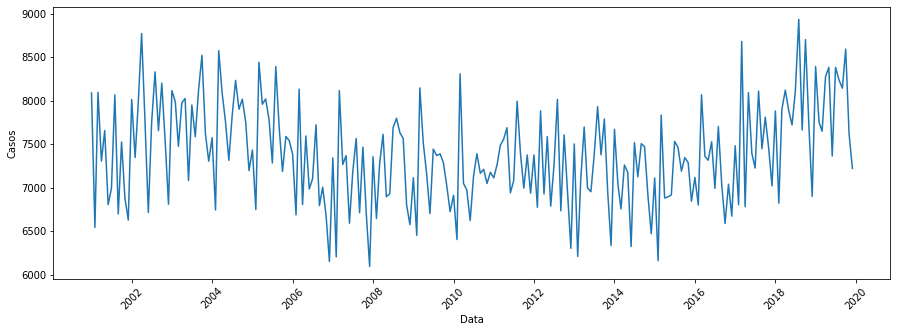

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Data", y="Casos", data=dados_st)
plt.xticks(rotation=45)
plt.show()

###<font color="darkturquoise"> **Desafio 03: Realizar os mesmos processos de transformação de série temporal para a base de dados da Hanseníase.**

In [ ]:
# Dados de frequência de Hanseníase no Brasil de 2001 a 2019.

url_hanseniase = "https://raw.githubusercontent.com/letpires/bootcamp_alura/main/modulo_04/datasets/frequencia_hanseniase_2001_2019.csv"

dados_hanseniase = pd.read_csv(url_hanseniase, encoding = "ISO-8859-1", sep=";",
                  skiprows=3, skipfooter=10, engine="python")

dados_hanseniase.head()

,Ano DiagnÃ³stico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,4107,4103,4787,4135,4724,3940,4116,4890,4035,4728,4197,3250,51012
1,2002,3982,4065,4566,5027,4663,4488,4971,5281,4805,5151,4679,3545,55223
2,2003,4127,5918,5555,4965,5013,4476,4655,4844,5249,5257,4737,3874,58670
3,2004,4168,4169,5612,4557,5440,5299,4975,5640,4825,4233,4520,3925,57363
4,2005,4078,4241,4998,4628,4706,4559,4154,5457,4853,5196,5008,4209,56087


In [ ]:
dados_hanseniase = dados_hanseniase.rename(columns={'Ano DiagnÃ³stico': 'Ano Diagnóstico'})
dados_hanseniase.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,4107,4103,4787,4135,4724,3940,4116,4890,4035,4728,4197,3250,51012
1,2002,3982,4065,4566,5027,4663,4488,4971,5281,4805,5151,4679,3545,55223
2,2003,4127,5918,5555,4965,5013,4476,4655,4844,5249,5257,4737,3874,58670
3,2004,4168,4169,5612,4557,5440,5299,4975,5640,4825,4233,4520,3925,57363
4,2005,4078,4241,4998,4628,4706,4559,4154,5457,4853,5196,5008,4209,56087


In [ ]:
#Limpeza de colunas e linhas que não serão necessárias para a análise. Ex: Total.

dados_hanseniase.drop("Total", axis=1, inplace=True)
dados_hanseniase.drop(19, inplace=True)
dados_hanseniase.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,4107,4103,4787,4135,4724,3940,4116,4890,4035,4728,4197,3250
1,2002,3982,4065,4566,5027,4663,4488,4971,5281,4805,5151,4679,3545
2,2003,4127,5918,5555,4965,5013,4476,4655,4844,5249,5257,4737,3874
3,2004,4168,4169,5612,4557,5440,5299,4975,5640,4825,4233,4520,3925
4,2005,4078,4241,4998,4628,4706,4559,4154,5457,4853,5196,5008,4209


In [ ]:
dados_st_hanseniase= transforma_para_serie_temporal (dados_hanseniase)
dados_st_hanseniase

,data,casos
0,2001-01-01,4107
1,2001-02-01,4103
2,2001-03-01,4787
3,2001-04-01,4135
4,2001-05-01,4724
...,...,...
223,2019-08-01,3107
224,2019-09-01,3060
225,2019-10-01,3137
226,2019-11-01,2715


In [ ]:
dados_st_hanseniase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    228 non-null    datetime64[ns]
 1   casos   228 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.7 KB


###<font color="darkturquoise"> **Desafio 04: Deixar o gráfico da série temporal bonitão.**

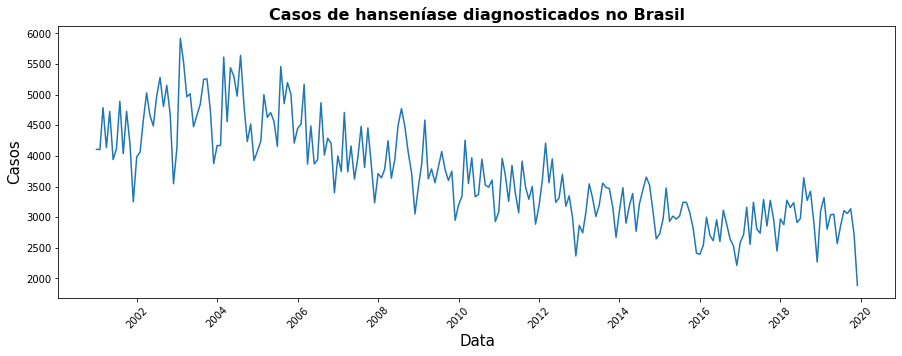

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x="data", y="casos", data=dados_st_hanseniase)

plt.title("Casos de hanseníase diagnosticados no Brasil", fontsize=16, fontweight = "bold")
plt.ylabel("Casos", fontsize=15)
plt.xlabel("Data", fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Criando um gráfico interativo

fig = px.line(data_frame=dados_st_hanseniase,x="data",y="casos",title="Série Temporal Hanseníase")
fig.show()

##<font color="hotpink">**Aula 03. Iniciando a análise de série temporal**

In [ ]:
dados_st.sort_values(by=["Data"], inplace=True)
dados_st.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Calcular média móvel considerando os ultimos 3 meses
# rolling considera janela de tempo - 3 meses

dados_st["Media_Movel_3"] = dados_st["Casos"].rolling(3).mean()
dados_st

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Data,Casos,Media_Movel_3
0,2001-01-01,8088,NaN
1,2001-02-01,6542,NaN
2,2001-03-01,8095,7575.000000
3,2001-04-01,7305,7314.000000
4,2001-05-01,7656,7685.333333
...,...,...,...
223,2019-08-01,8239,7994.666667
224,2019-09-01,8143,8254.666667
225,2019-10-01,8592,8324.666667
226,2019-11-01,7615,8116.666667


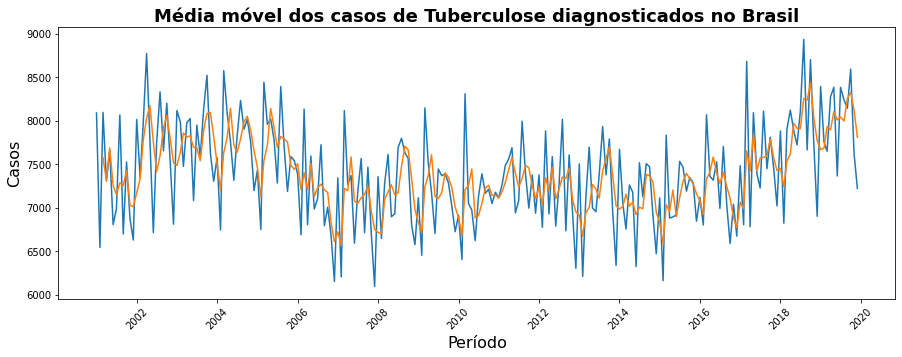

In [ ]:
# visualização média móvel 3 meses

plt.figure(figsize=(15,5))
sns.lineplot(x="Data", y="Casos", data=dados_st)
sns.lineplot(x="Data", y="Media_Movel_3", data=dados_st)

plt.title("Média móvel dos casos de Tuberculose diagnosticados no Brasil", fontsize=18, fontweight="bold")
plt.ylabel("Casos", fontsize=16)
plt.xlabel("Período", fontsize=16);

plt.xticks(rotation=45)
plt.show()

In [ ]:
# Criando uma média móvel de 6 meses

dados_st["Media_Movel_6"] = dados_st["Casos"].rolling(6).mean()
dados_st.head()

,Data,Casos,Media_Movel_3,Media_Movel_6
0,2001-01-01,8088,NaN,NaN
1,2001-02-01,6542,NaN,NaN
2,2001-03-01,8095,7575.000000,NaN
3,2001-04-01,7305,7314.000000,NaN
4,2001-05-01,7656,7685.333333,NaN


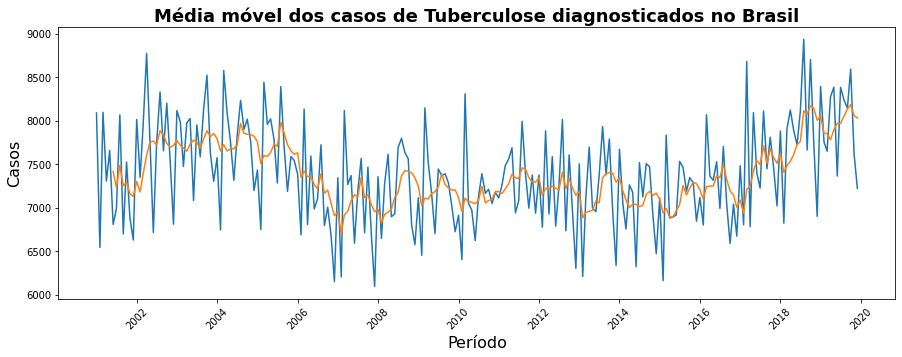

In [ ]:
# visualização média móvel 6 meses

plt.figure(figsize=(15,5))
sns.lineplot(x="Data", y="Casos", data=dados_st)
sns.lineplot(x="Data", y="Media_Movel_6", data=dados_st)

plt.title("Média móvel dos casos de Tuberculose diagnosticados no Brasil", fontsize=18, fontweight="bold")
plt.ylabel("Casos", fontsize=16)
plt.xlabel("Período", fontsize=16);

plt.xticks(rotation=45)
plt.show()

In [ ]:
dados_st = dados_st[["Casos", "Data", "Media_Movel_3", "Media_Movel_6"]]
dados_st

,Casos,Data,Media_Movel_3,Media_Movel_6
0,8088,2001-01-01,NaN,NaN
1,6542,2001-02-01,NaN,NaN
2,8095,2001-03-01,7575.000000,NaN
3,7305,2001-04-01,7314.000000,NaN
4,7656,2001-05-01,7685.333333,NaN
...,...,...,...,...
223,8239,2019-08-01,7994.666667,8048.166667
224,8143,2019-09-01,8254.666667,8130.666667
225,8592,2019-10-01,8324.666667,8183.666667
226,7615,2019-11-01,8116.666667,8055.666667


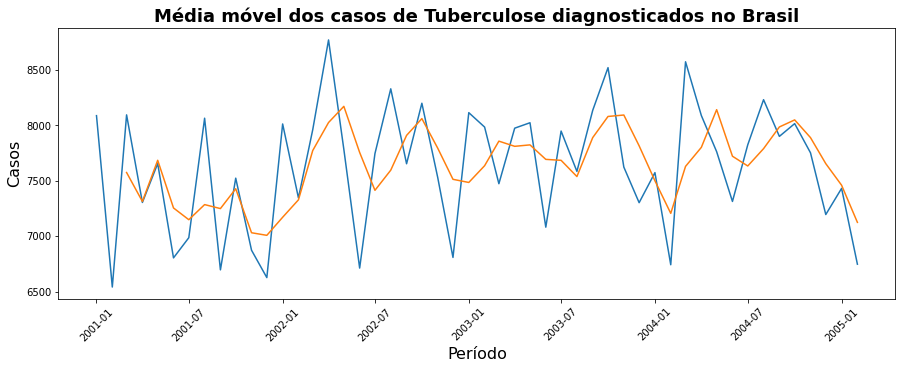

In [ ]:
# visualização média móvel 3 meses: parece que o pico da média móvel está atrasado

plt.figure(figsize=(15,5))

sns.lineplot(x="Data", y="Casos", data=dados_st[:50])
sns.lineplot(x="Data", y="Media_Movel_3", data=dados_st[:50])

plt.title("Média móvel dos casos de Tuberculose diagnosticados no Brasil", fontsize=18, fontweight="bold")
plt.ylabel("Casos", fontsize=16)
plt.xlabel("Período", fontsize=16);

plt.xticks(rotation=45)
plt.show()

In [ ]:
# Média móvel centrada com janela de 3 meses

dados_st["Media_Movel_3c"] = dados_st["Casos"].rolling(3, center=True).mean()
dados_st.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Casos,Data,Media_Movel_3,Media_Movel_6,Media_Movel_3c
0,8088,2001-01-01,NaN,NaN,NaN
1,6542,2001-02-01,NaN,NaN,7575.000000
2,8095,2001-03-01,7575.000000,NaN,7314.000000
3,7305,2001-04-01,7314.000000,NaN,7685.333333
4,7656,2001-05-01,7685.333333,NaN,7255.333333


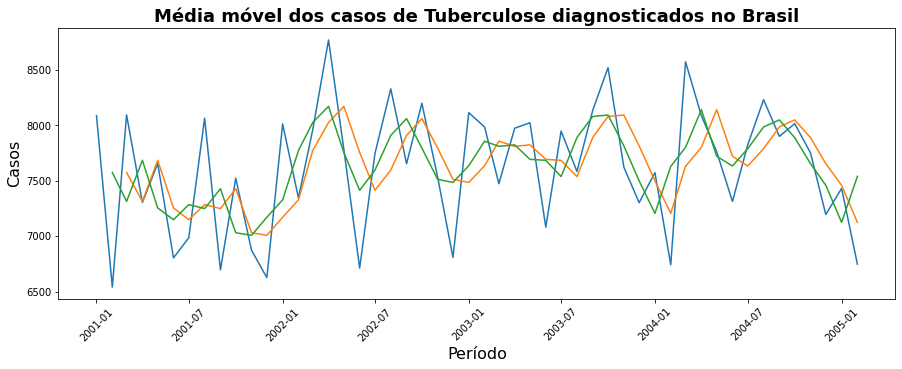

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Data", y="Casos", data=dados_st[:50])
sns.lineplot(x="Data", y="Media_Movel_3", data=dados_st[:50])
sns.lineplot(x="Data", y="Media_Movel_3c", data=dados_st[:50])

plt.title("Média móvel dos casos de Tuberculose diagnosticados no Brasil", fontsize=18, fontweight="bold")
plt.ylabel("Casos", fontsize=16)
plt.xlabel("Período", fontsize=16);

plt.xticks(rotation=45)
plt.show()

In [ ]:
# Média móvel centrada com janela de 6 meses

dados_st["Media_movel_6c"] = dados_st["Casos"].rolling(6, center=True).mean()
dados_st.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Casos,Data,Media_Movel_3,Media_Movel_6,Media_Movel_3c,Media_movel_6c
0,8088,2001-01-01,NaN,NaN,NaN,NaN
1,6542,2001-02-01,NaN,NaN,7575.000000,NaN
2,8095,2001-03-01,7575.000000,NaN,7314.000000,NaN
3,7305,2001-04-01,7314.000000,NaN,7685.333333,7415.166667
4,7656,2001-05-01,7685.333333,NaN,7255.333333,7231.666667


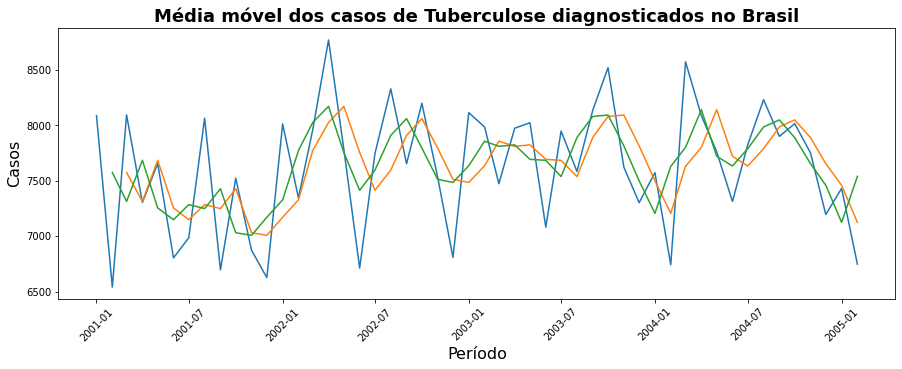

In [ ]:
# Visualização: casos totais, média móvel (3) e média móvel centrada (3)

plt.figure(figsize=(15,5))
sns.lineplot(x="Data", y="Casos", data=dados_st[:50])
sns.lineplot(x="Data", y="Media_Movel_3", data=dados_st[:50])
sns.lineplot(x="Data", y="Media_Movel_3c", data=dados_st[:50])

plt.title("Média móvel dos casos de Tuberculose diagnosticados no Brasil", fontsize=18, fontweight="bold")
plt.ylabel("Casos", fontsize=16)
plt.xlabel("Período", fontsize=16);

plt.xticks(rotation=45)
plt.show()

###<font color="darkturquoise"> **Desafio 05: Analisar outras janelas para a média móvel dos casos de Tuberculose e Hanseníase.**

**TUBERCULOSE**

In [ ]:
# Média móvel centrada com janela de 12 meses
dados_st["Media_movel_12c"] = dados_st["Casos"].rolling(12, center=True).mean()
dados_st.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Casos,Data,Media_Movel_3,Media_Movel_6,Media_Movel_3c,Media_movel_6c,Media_movel_12c
0,8088,2001-01-01,NaN,NaN,NaN,NaN,NaN
1,6542,2001-02-01,NaN,NaN,7575.000000,NaN,NaN
2,8095,2001-03-01,7575.000000,NaN,7314.000000,NaN,NaN
3,7305,2001-04-01,7314.000000,NaN,7685.333333,7415.166667,NaN
4,7656,2001-05-01,7685.333333,NaN,7255.333333,7231.666667,NaN


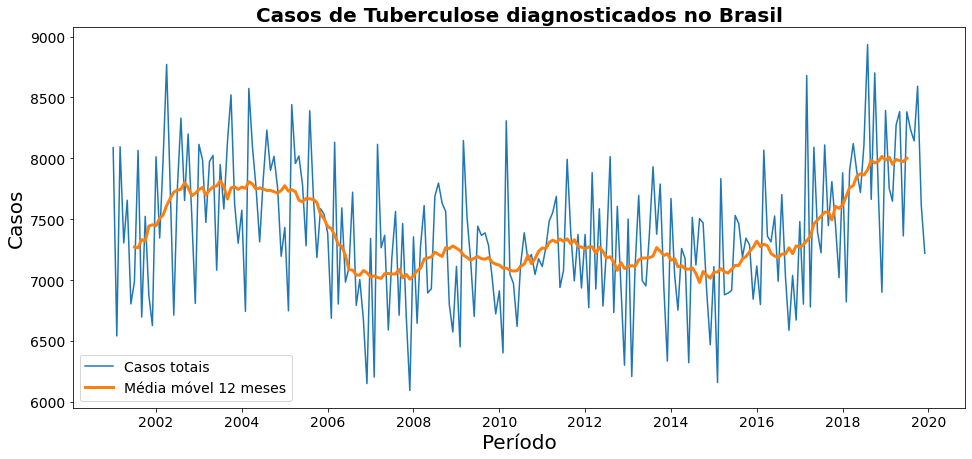

In [ ]:
# visualização: casos totais, média móvel centrada (12 meses) 

plt.figure(figsize=(16,7))

sns.lineplot(x="Data", y="Casos", data=dados_st, label="Casos totais")
sns.lineplot(x="Data", y="Media_movel_12c", data=dados_st, label="Média móvel 12 meses", linewidth=3)

plt.legend(fontsize=14)

plt.title("Casos de Tuberculose diagnosticados no Brasil", fontsize=20, fontweight="bold")
plt.ylabel("Casos", fontsize=20)
plt.xlabel("Período", fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

**HANSENÍASE**

In [ ]:
dados_st_hanseniase['Média Móvel Trimestral'] = dados_st_hanseniase['casos'].rolling(3, center=True).mean()
dados_st_hanseniase['Média Móvel Semestral'] = dados_st_hanseniase['casos'].rolling(6, center=True).mean()
dados_st_hanseniase['Média Móvel Anual'] = dados_st_hanseniase['casos'].rolling(12, center=True).mean()

dados_st_hanseniase.head()

,data,casos,Média Móvel Trimestral,Média Móvel Semestral,Média Móvel Anual
0,2001-01-01,4107,NaN,NaN,NaN
1,2001-02-01,4103,4332.333333,NaN,NaN
2,2001-03-01,4787,4341.666667,NaN,NaN
3,2001-04-01,4135,4548.666667,4299.333333,NaN
4,2001-05-01,4724,4266.333333,4300.833333,NaN


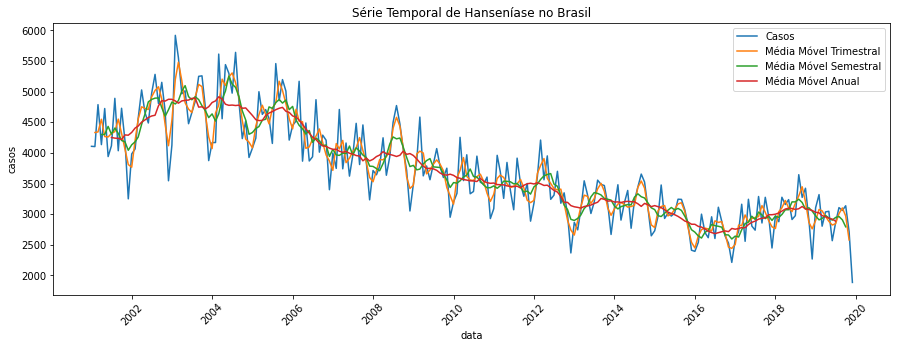

In [ ]:
plt.figure(figsize=(15,5))
  
sns.lineplot(x="data", y="casos", data=dados_st_hanseniase)
sns.lineplot(x="data", y="Média Móvel Trimestral", data=dados_st_hanseniase)
sns.lineplot(x="data", y="Média Móvel Semestral", data=dados_st_hanseniase)
sns.lineplot(x="data", y="Média Móvel Anual", data=dados_st_hanseniase)
plt.xticks(rotation=45)
plt.title("Série Temporal de Hanseníase no Brasil")
plt.legend(["Casos","Média Móvel Trimestral","Média Móvel Semestral", "Média Móvel Anual"])
plt.show()

###<font color="darkturquoise"> **Desafio 06: Fazer uma previsão dos próximos casos.**

In [ ]:
#Prever ano de 2004 utilizando a média de dados de 2003
dados_st[['Data', 'Casos']].iloc[24:36]

,Data,Casos
24,2003-01-01,8115
25,2003-02-01,7985
26,2003-03-01,7474
27,2003-04-01,7975
28,2003-05-01,8024
29,2003-06-01,7082
30,2003-07-01,7949
31,2003-08-01,7585
32,2003-09-01,8136
33,2003-10-01,8521


In [ ]:
dados_2003_media_3 = dados_st[['Data', 'Casos']].rolling(3).mean(numeric_only=True).iloc[24:36]
dados_2003_media_3['Data'] = dados_st[36:48]['Data'].to_list()
dados_2003_media_3

,Casos,Data
24,7485.333333,2004-01-01
25,7636.333333,2004-02-01
26,7858.000000,2004-03-01
27,7811.333333,2004-04-01
28,7824.333333,2004-05-01
29,7693.666667,2004-06-01
30,7685.000000,2004-07-01
31,7538.666667,2004-08-01
32,7890.000000,2004-09-01
33,8080.666667,2004-10-01


In [ ]:
media_ano_2003 = dados_st[['Data', 'Casos']].iloc[24:36].mean(numeric_only=True)
media_ano_2003

Casos    7814.416667
dtype: float64

In [ ]:
dados_st['previsao (media_2003)'] = [media_ano_2003[0] for _ in range(len(dados_st))]
dados_st.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Casos,Data,Media_Movel_3,Media_Movel_6,Media_Movel_3c,Media_movel_6c,Media_movel_12c,previsao (media_2003)
0,8088,2001-01-01,NaN,NaN,NaN,NaN,NaN,7814.416667
1,6542,2001-02-01,NaN,NaN,7575.000000,NaN,NaN,7814.416667
2,8095,2001-03-01,7575.000000,NaN,7314.000000,NaN,NaN,7814.416667
3,7305,2001-04-01,7314.000000,NaN,7685.333333,7415.166667,NaN,7814.416667
4,7656,2001-05-01,7685.333333,NaN,7255.333333,7231.666667,NaN,7814.416667


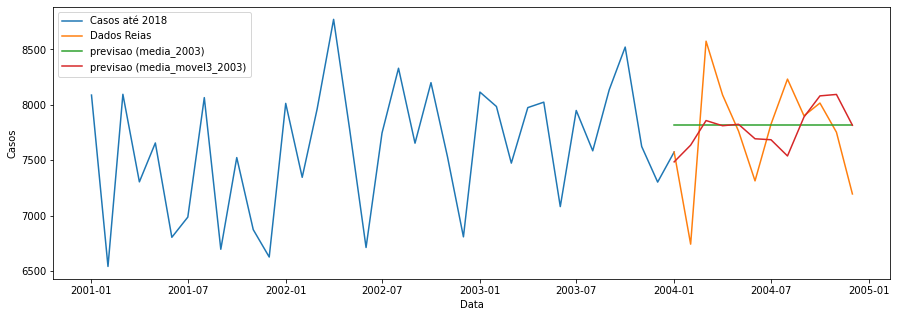

In [ ]:
plt.figure(figsize=(15,5))

sns.lineplot(x="Data", y="Casos", data=dados_st[:37],label='Casos até 2018')
sns.lineplot(x="Data", y="Casos", data=dados_st[36:48], label='Dados Reias')
sns.lineplot(x="Data", y="previsao (media_2003)", data=dados_st[36:48], label='previsao (media_2003)')
sns.lineplot(x="Data", y="Casos", data=dados_2003_media_3, label='previsao (media_movel3_2003)')
dados_2003_media_3

plt.show()

##<font color="hotpink">**Aula 04. Decomposição e Autocorrelação**

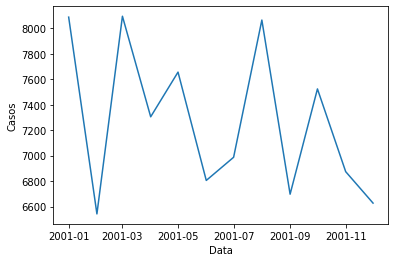

In [ ]:
sns.lineplot(x="Data", y="Casos", data=dados_st[:12])

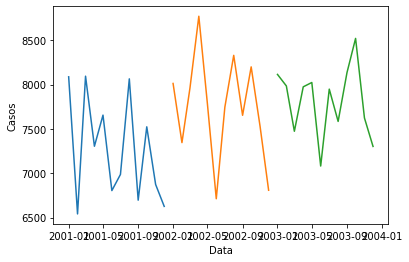

In [ ]:
sns.lineplot(x="Data", y="Casos", data=dados_st[:12])
sns.lineplot(x="Data", y="Casos", data=dados_st[12:24])
sns.lineplot(x="Data", y="Casos", data=dados_st[24:36])

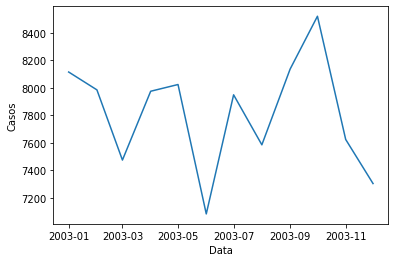

In [ ]:
sns.lineplot(x="Data", y="Casos", data=dados_st[24:36])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



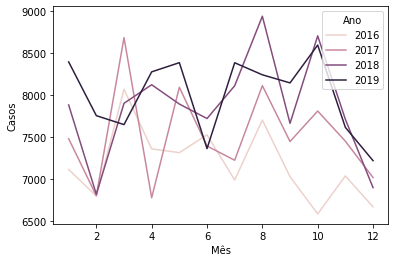

In [ ]:
dados_st["Ano"] = dados_st["Data"].dt.year
dados_st["Mês"] = dados_st["Data"].dt.month

sns.lineplot(x="Mês", y="Casos", data=dados_st.query("Ano in [2019, 2018, 2017, 2016]"), hue="Ano")

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicao = seasonal_decompose(dados_st[["Data", "Casos"]].set_index("Data"))

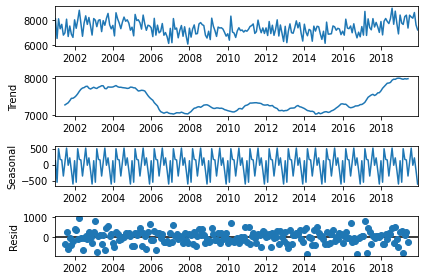

In [ ]:
#Gera gráficos de tendência, sazonalidade e resíduos.

decomposicao.plot();

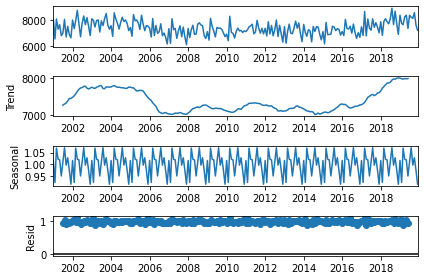

In [ ]:
decomposicao = seasonal_decompose(dados_st[["Data", "Casos"]].set_index("Data"), model="multiplicative")
decomposicao.plot();


In [ ]:
url_passageiros = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv"
dados_passageiros = pd.read_csv(url_passageiros)

In [ ]:
dados_passageiros.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
dados_passageiros["Month"] = pd.to_datetime(dados_passageiros["Month"])
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


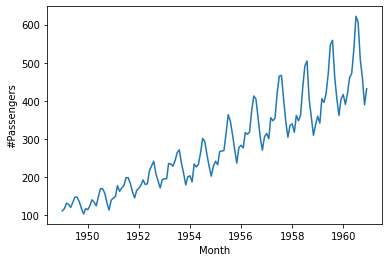

In [ ]:
sns.lineplot(x="Month", y="#Passengers", data=dados_passageiros)

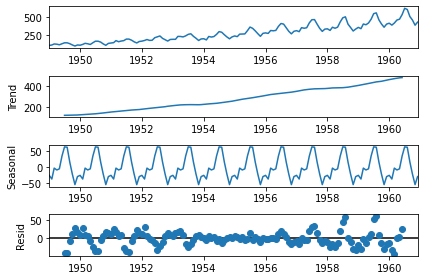

In [ ]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index("Month"))
decomposicao_p.plot();

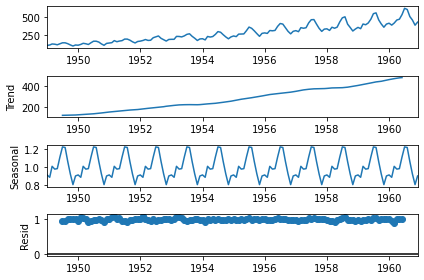

In [ ]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index("Month"), model="multiplicative")
decomposicao_p.plot();

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

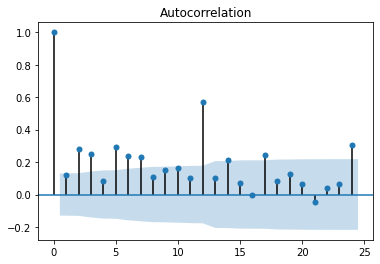

In [ ]:
plot_acf(dados_st["Casos"]);

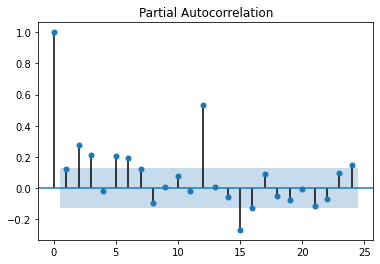

In [ ]:
plot_pacf(dados_st["Casos"]);

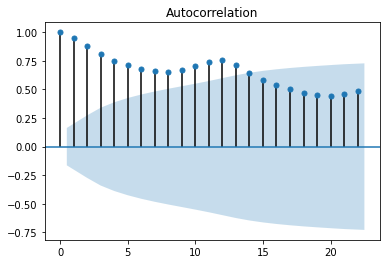

In [ ]:
plot_acf(dados_passageiros["#Passengers"]);

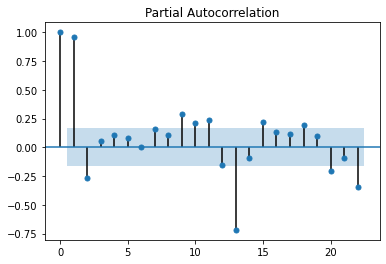

In [ ]:
plot_pacf(dados_passageiros["#Passengers"]);

Algumas conclusões e entendimentos sobre os gráficos de autocorrelação:
- A faixa azul representa o intervalo de confiança;
- Todas as autocorrelações que estão dentro desse intervalo, são irrelevantes;
- Abaixo e acima desse intervalo de confiança, é onde está as autocorrelações relevantes;
- O lag 1 apresenta uma influência bem forte, que explica muito bem a nossa série. E a partir do lag 3 pode se observar que uma onda se forma e pode estar indicando a sazonalidade nos nossos dados.

###<font color="darkturquoise"> **Desafio 07:Transformar as datas em index e realizar os slices pelas datas.**

In [ ]:
dados_st.head()

,Casos,Data,Media_Movel_3,Media_Movel_6,Media_Movel_3c,Media_movel_6c,Media_movel_12c,previsao (media_2003),Ano,Mês
0,8088,2001-01-01,NaN,NaN,NaN,NaN,NaN,7814.416667,2001,1
1,6542,2001-02-01,NaN,NaN,7575.000000,NaN,NaN,7814.416667,2001,2
2,8095,2001-03-01,7575.000000,NaN,7314.000000,NaN,NaN,7814.416667,2001,3
3,7305,2001-04-01,7314.000000,NaN,7685.333333,7415.166667,NaN,7814.416667,2001,4
4,7656,2001-05-01,7685.333333,NaN,7255.333333,7231.666667,NaN,7814.416667,2001,5


In [ ]:
dados_st_data_index = dados_st.set_index('Data')
dados_st_data_index.head()

,Casos,Media_Movel_3,Media_Movel_6,Media_Movel_3c,Media_movel_6c,Media_movel_12c,previsao (media_2003),Ano,Mês
Data,,,,,,,,,
2001-01-01,8088,NaN,NaN,NaN,NaN,NaN,7814.416667,2001,1
2001-02-01,6542,NaN,NaN,7575.000000,NaN,NaN,7814.416667,2001,2
2001-03-01,8095,7575.000000,NaN,7314.000000,NaN,NaN,7814.416667,2001,3
2001-04-01,7305,7314.000000,NaN,7685.333333,7415.166667,NaN,7814.416667,2001,4
2001-05-01,7656,7685.333333,NaN,7255.333333,7231.666667,NaN,7814.416667,2001,5


In [ ]:
dados_st_data_index.loc['2001-01-01':'2002-12-01']

,Casos,Media_Movel_3,Media_Movel_6,Media_Movel_3c,Media_movel_6c,Media_movel_12c,previsao (media_2003),Ano,Mês
Data,,,,,,,,,
2001-01-01,8088,NaN,NaN,NaN,NaN,NaN,7814.416667,2001,1
2001-02-01,6542,NaN,NaN,7575.000000,NaN,NaN,7814.416667,2001,2
2001-03-01,8095,7575.000000,NaN,7314.000000,NaN,NaN,7814.416667,2001,3
2001-04-01,7305,7314.000000,NaN,7685.333333,7415.166667,NaN,7814.416667,2001,4
2001-05-01,7656,7685.333333,NaN,7255.333333,7231.666667,NaN,7814.416667,2001,5
2001-06-01,6805,7255.333333,7415.166667,7149.333333,7485.500000,NaN,7814.416667,2001,6
2001-07-01,6987,7149.333333,7231.666667,7285.666667,7252.500000,7272.083333,7814.416667,2001,7
2001-08-01,8065,7285.666667,7485.500000,7249.666667,7289.000000,7265.833333,7814.416667,2001,8
2001-09-01,6697,7249.666667,7252.500000,7428.666667,7158.666667,7332.833333,7814.416667,2001,9


###<font color="darkturquoise"> **Desafio 08:Formatar os gráficos de decomposição, colocar título e modificar os tamanhos. Realizar a decomposição de outras séries temporais.**

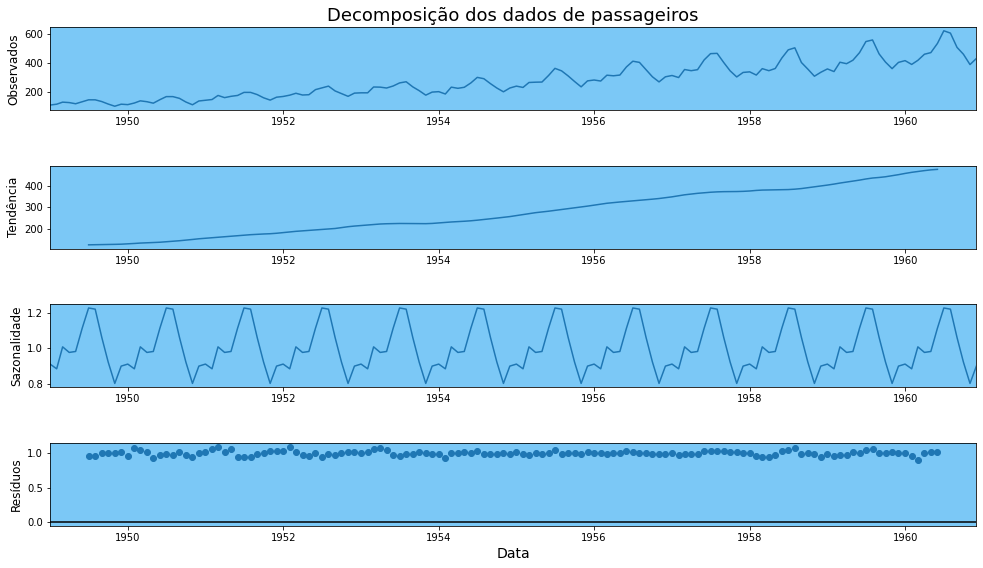

In [ ]:
# Plotar os dados da decomposição
figure = decomposicao_p.plot()
figure.axes[0].set_title('Decomposição dos dados de passageiros', fontsize=18)

# A linha acima adiciona o título e gera espaço para que ele caiba sem sobrepor
# O [0] representa o gráfico 0, acima desse gráfico porque é title.

figure.set_size_inches(15,8)
figure.axes[3].set_xlabel('Data', fontsize=14)
figure.axes[0].set_ylabel('Observados', fontsize=12)
figure.axes[1].set_ylabel('Tendência', fontsize=12)
figure.axes[2].set_ylabel('Sazonalidade', fontsize=12)
figure.axes[3].set_ylabel('Resíduos', fontsize=12)
figure.axes[3].set_facecolor('xkcd:lightblue')
figure.axes[2].set_facecolor('xkcd:lightblue')
figure.axes[1].set_facecolor('xkcd:lightblue')
figure.axes[0].set_facecolor('xkcd:lightblue')

figure;

###<font color="darkturquoise"> **Desafio 09: Realizar uma autocorrelação e autocorrelação parcial dos dados de COVID-19.**

In [ ]:
url_covid = 'https://github.com/letpires/bootcamp_alura/blob/main/modulo_04/datasets/casos_covid.zip?raw=true'
dados_covid = pd.read_csv(url_covid, sep=';', engine='python', compression='zip')
dados_covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [ ]:
# Filtrando os dados apenas do Brasil

dados_covid = dados_covid[['data', 'casosNovos', 'obitosNovos']].iloc[:327]
dados_covid.tail()

,data,casosNovos,obitosNovos
322,2021-01-11,25822,480
323,2021-01-12,64025,1110
324,2021-01-13,60899,1274
325,2021-01-13,0,0
326,2021-01-14,67758,1131


In [ ]:
dados_covid['data'] = pd.to_datetime(dados_covid['data'])
dados_covid.head()

,data,casosNovos,obitosNovos
0,2020-02-25,0,0
1,2020-02-26,1,0
2,2020-02-27,0,0
3,2020-02-28,0,0
4,2020-02-29,1,0


In [ ]:
#Criando um gráfico interativo

fig = px.line(data_frame=dados_covid,x="data",y="casosNovos",title="Casos de COVID ao longo dos anos")
fig.show()

In [ ]:
dados_covid['data'].value_counts()

2020-12-24    2
2021-01-13    2
2020-03-13    1
2020-09-14    1
2020-05-30    1
             ..
2020-05-29    1
2020-04-28    1
2020-03-28    1
2020-02-26    1
2020-12-31    1
Name: data, Length: 325, dtype: int64

In [ ]:
dados_covid[dados_covid['data'] == '2020-12-24']

,data,casosNovos,obitosNovos
303,2020-12-24,60076,786
304,2020-12-24,0,0


In [ ]:
dados_covid[dados_covid['data'] == '2021-01-13']

,data,casosNovos,obitosNovos
324,2021-01-13,60899,1274
325,2021-01-13,0,0


In [ ]:
dados_covid = dados_covid.drop(index=[304, 325])
dados_covid['data'].value_counts()

2020-03-13    1
2020-08-28    1
2020-05-30    1
2020-04-29    1
2020-03-29    1
             ..
2020-05-29    1
2020-04-28    1
2020-03-28    1
2020-02-26    1
2020-12-31    1
Name: data, Length: 325, dtype: int64

In [ ]:
dados_covid = dados_covid.set_index('data').asfreq('d')
dados_covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 2020-02-25 to 2021-01-14
Freq: D
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   casosNovos   325 non-null    int64
 1   obitosNovos  325 non-null    int64
dtypes: int64(2)
memory usage: 7.6 KB


In [ ]:
decomposicao_covid = seasonal_decompose(dados_covid[['casosNovos']])

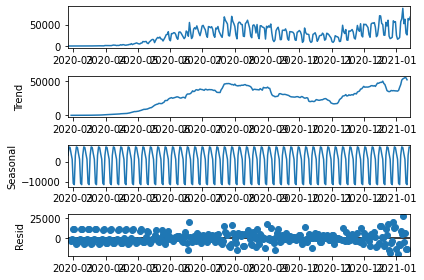

In [ ]:
decomposicao_covid.plot();

##<font color="hotpink">**Aula 05. Previsões em Séries Temporais**

In [ ]:
# Modificando os nomes das colunas

dados_passageiros.rename({"Month": "Data", "#Passengers": "Passageiros"}, axis=1, inplace=True)
dados_passageiros.head()

,Data,Passageiros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
# Extraindo o mês e ano da data através do dt (datetime) e criando uma nova coluna chamada Mês e Ano.

dados_passageiros["Mês"] = dados_passageiros["Data"].dt.month
dados_passageiros["Ano"] = dados_passageiros["Data"].dt.year
dados_passageiros.head()

,Data,Passageiros,Mês,Ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949


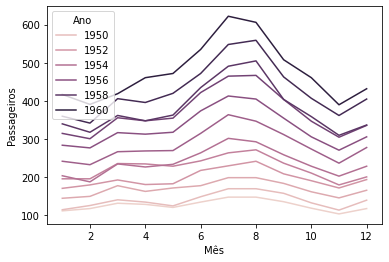

In [ ]:
sns.lineplot(x="Mês", y="Passageiros", data=dados_passageiros, hue="Ano")

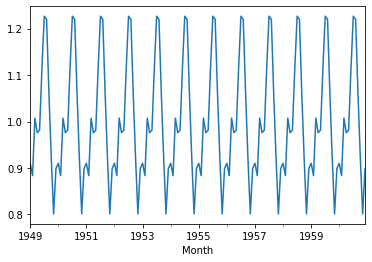

In [ ]:
decomposicao_p.seasonal.plot()

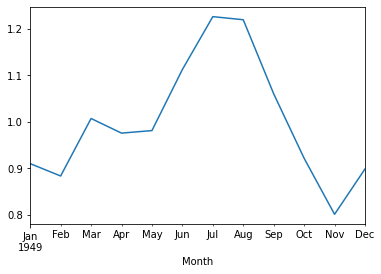

In [ ]:
# Plotando gráfico de sazonalidade de 12 meses.
# A sazonalidade alta nos meses de julho e agosto pode ser explicada pelo período de férias.
# O gráfico reflete uma aproximação geral de todos os anos.

decomposicao_p.seasonal[:12].plot()

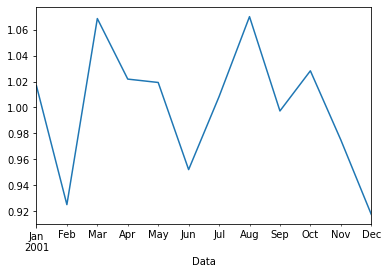

In [ ]:
decomposicao.seasonal[:12].plot()

In [ ]:
# Utiliza todos os anos menos 2019, pois a previsão será feita pra 2019
dados_treino_tuberculose = dados_st.query("Ano!=2019")

#dados de teste é o que quero prever
dados_teste_tuberculose = dados_st.query("Ano == 2019")

modelo_arima = ARIMA(dados_treino_tuberculose["Casos"].values.astype("float32"), order=[12,1,2])
modelo_arima_treinado = modelo_arima.fit()

## Previsão feitas dos próximos 12 meses.
# Fez a média de toda a série histórica
previsao = modelo_arima_treinado.forecast(12)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

In [ ]:
previsao

array([8216.6424095 , 7149.9942677 , 7970.01965973, 8163.98839685,
       7785.68661948, 7891.92112849, 7928.50841687, 8471.04779394,
       7865.80145295, 8383.95028473, 7831.00507078, 7269.16645958])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



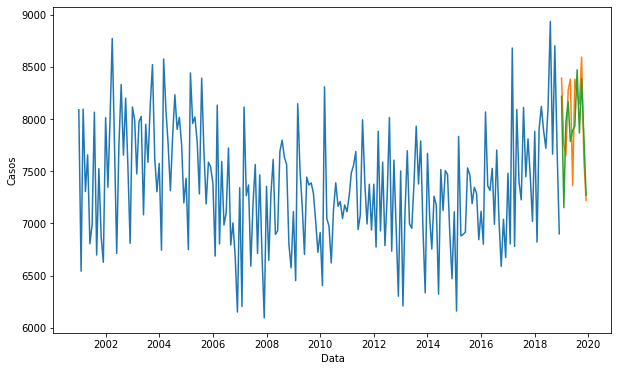

In [ ]:
# Esse gráfico mostra a previsão de 2019 em verde, a série temporal de 2019 em laranja e todo o restante da série temporal em azul.
# É possível visualizar que a previsão é uma média de todo o período. Pra melhorar isso, precisamos alterar os parâmetros order.

dados_teste_tuberculose["previsao"]=previsao
plt.figure(figsize=(10,6))
sns.lineplot(x="Data", y="Casos", data=dados_treino_tuberculose)
sns.lineplot(x="Data", y="Casos", data=dados_teste_tuberculose)
sns.lineplot(x="Data", y="previsao", data=dados_teste_tuberculose)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

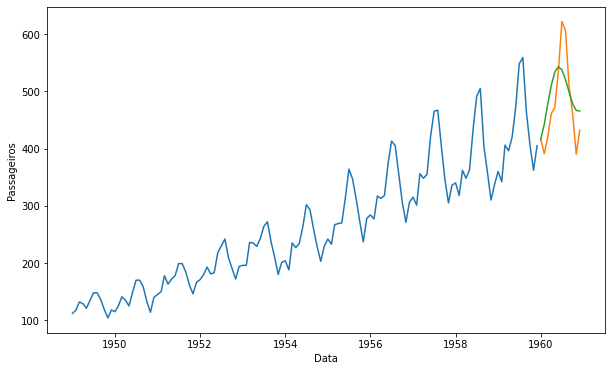

In [ ]:
#Fazendo a previsão com os dados de passageiros

dados_treino_passageiros = dados_passageiros.query("Ano!=1960")

dados_teste_passageiros = dados_passageiros.query("Ano == 1960")

#Foi modificado o parâmetro order.
modelo_arima = ARIMA(dados_treino_passageiros["Passageiros"].values.astype("float32"), order=[2,1,2])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

dados_teste_passageiros["previsao"]=previsao
plt.figure(figsize=(10,6))
sns.lineplot(x="Data", y="Passageiros", data=dados_treino_passageiros)
sns.lineplot(x="Data", y="Passageiros", data=dados_teste_passageiros)
sns.lineplot(x="Data", y="previsao", data=dados_teste_passageiros)

###<font color="darkturquoise"> **Desafio 10: Na tupla de retorno do forecast, estudar documentação para entender o que são cada elemento.**

 def forecast(self, steps=1, exog=None, alpha=.05):
        Returns
        -------
        forecast : array
            Array of out of sample forecasts
        stderr : array
            Array of the standard error of the forecasts.
        conf_int : array
            2d array of the confidence interval for the forecast
  

Segundo a documentação da função, os parâmetros são:

    * forecast: array contendo a previsão
    * stderr: array contendo o desvio padrão das previões
    * conf_int: array de 2 dimensões contendo o intervalo de confiança de cada previsão.

###<font color="darkturquoise"> **Desafio 11: Utilizar o modelo ARIMA para a base de dads de passageiros e modificar o parâmetro order.**

In [ ]:
def criar_modelo_analise(dataset: pd.DataFrame,str_treino:str,str_teste:str,coluna:str,pesos:tuple):
  dataset_usado = dataset
  dados_treino  = dataset_usado.query(f"{str_treino}")
  dados_teste   = dataset_usado.query(f"{str_teste}")

  modelo = ARIMA(dataset_usado[f"{coluna}"].values.astype("float32"),order = pesos)
  modelo_treinado = modelo.fit()

  previsao_criada = modelo_treinado.forecast(12)[0]

  return previsao_criada

In [ ]:
variavel_prev_1 = criar_modelo_analise(dados_passageiros,"Ano !=1960","Ano == 1960","Passageiros",(12,1,0))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



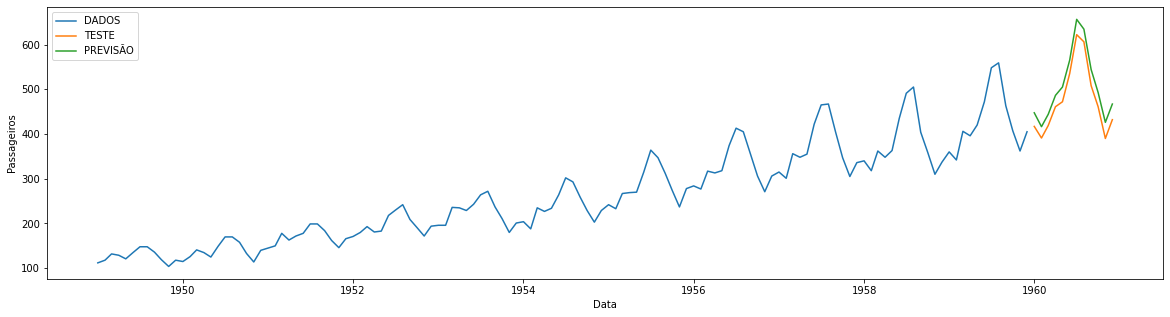

In [ ]:
plt.figure(figsize=(20,5))
dados_teste_passageiros["Previsao"] = variavel_prev_1
sns.lineplot(x="Data",y="Passageiros",data = dados_treino_passageiros)
sns.lineplot(x="Data",y="Passageiros",data = dados_teste_passageiros)
sns.lineplot(x="Data",y="Previsao",data = dados_teste_passageiros)
plt.legend(["DADOS","TESTE","PREVISÃO"])
plt.show()

###<font color="darkturquoise"> **Desafio 12: Calcula uma série temporal diferenciada de 1 e 2 ordem e plotar os gráficos destas séries para verificar o efeito do parâmetro de diferenciação do ARIMA.**

Será calculada a série temporal diferenciada para os dados dos passageiros

In [ ]:
dados_passageiros.head()

,Data,Passageiros,Mês,Ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949


In [ ]:
dados_passageiros.tail()

,Data,Passageiros,Mês,Ano
139,1960-08-01,606,8,1960
140,1960-09-01,508,9,1960
141,1960-10-01,461,10,1960
142,1960-11-01,390,11,1960
143,1960-12-01,432,12,1960


In [ ]:
dados_passageiros['Diff'] = dados_passageiros['Passageiros'].diff()
dados_passageiros.head()

,Data,Passageiros,Mês,Ano,Diff
0,1949-01-01,112,1,1949,NaN
1,1949-02-01,118,2,1949,6.0
2,1949-03-01,132,3,1949,14.0
3,1949-04-01,129,4,1949,-3.0
4,1949-05-01,121,5,1949,-8.0


In [ ]:
dados_passageiros['Diff 2'] = dados_passageiros['Diff'].diff()
dados_passageiros.head()

,Data,Passageiros,Mês,Ano,Diff,Diff 2
0,1949-01-01,112,1,1949,NaN,NaN
1,1949-02-01,118,2,1949,6.0,NaN
2,1949-03-01,132,3,1949,14.0,8.0
3,1949-04-01,129,4,1949,-3.0,-17.0
4,1949-05-01,121,5,1949,-8.0,-5.0


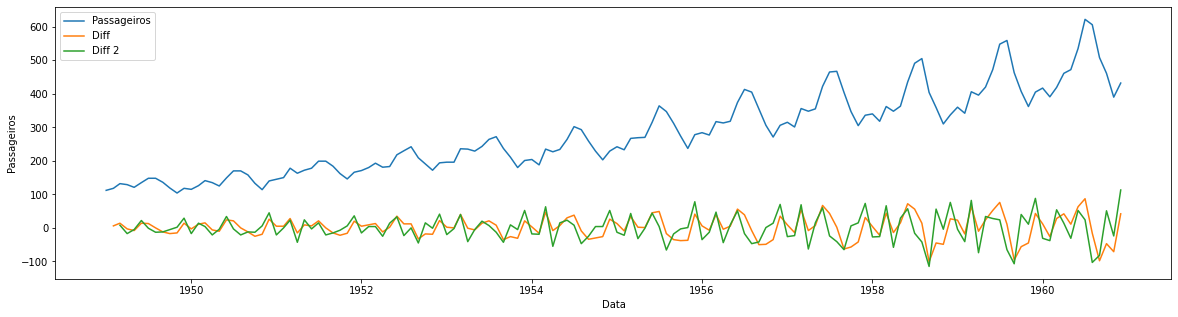

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x="Data",y="Passageiros",data = dados_passageiros)
sns.lineplot(x="Data",y="Diff",data = dados_passageiros)
sns.lineplot(x="Data",y="Diff 2",data = dados_passageiros)
plt.legend(["Passageiros","Diff","Diff 2"])
plt.show()

##<font color="hotpink">**Aula 06. AUTOARIMA e Prophnet**

**1. Utilizando o modelo AUTOARIMA:**

In [ ]:
# Parâmetro trace=True é para mostrar todos os testes de order que o modelo está fazendo
# Adicionado parâmetro de sazonalidade
# m=12 refere-se a periodicidade de 12 meses.
# AIC é uma métrica, usada pra medir a diferença da série temporal que estamos ajustando aos dados conhecidos. Quanto menor o valor, melhor a resposta.

modelo_autoarima = auto_arima(dados_treino_tuberculose["Casos"].values, error_action="ignore", trace=True, seasonal=True, m=12)
modelo_autoarima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.17 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.35 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.16 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=1.90 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.16 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=1.16 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=2.44 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=0.93 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.87 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



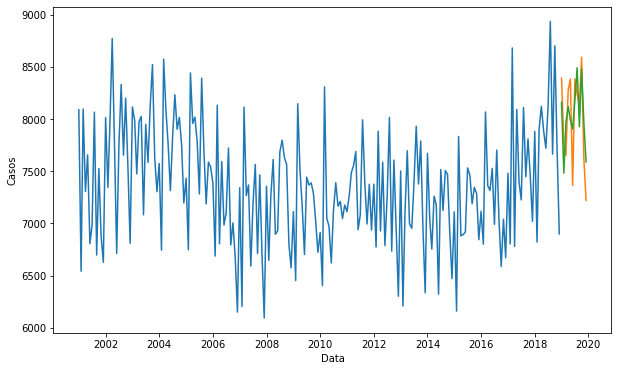

In [ ]:
#Previsão para 1 ano (12 meses)
previsao_autoarima = modelo_autoarima.predict(12)

dados_teste_tuberculose["previsao_autoarima"] = previsao_autoarima
plt.figure(figsize=(10,6))
sns.lineplot(x="Data", y="Casos", data=dados_treino_tuberculose)
sns.lineplot(x="Data", y="Casos", data=dados_teste_tuberculose)
sns.lineplot(x="Data", y="previsao_autoarima", data=dados_teste_tuberculose)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



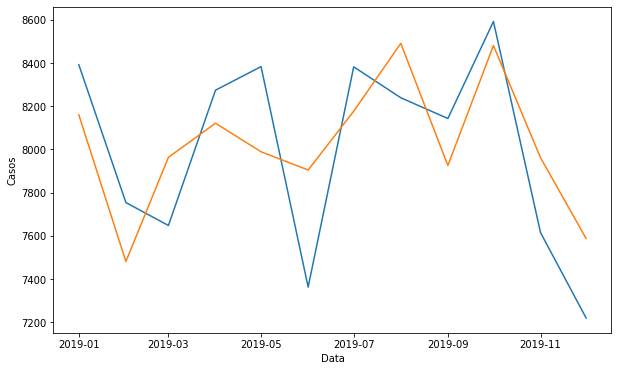

In [ ]:
#Previsão para 1 ano (12 meses)
previsao_autoarima = modelo_autoarima.predict(12)

dados_teste_tuberculose["previsao_autoarima"] = previsao_autoarima
plt.figure(figsize=(10,6))
#sns.lineplot(x="Data", y="Casos", data=dados_treino_tuberculose)
sns.lineplot(x="Data", y="Casos", data=dados_teste_tuberculose)
sns.lineplot(x="Data", y="previsao_autoarima", data=dados_teste_tuberculose)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



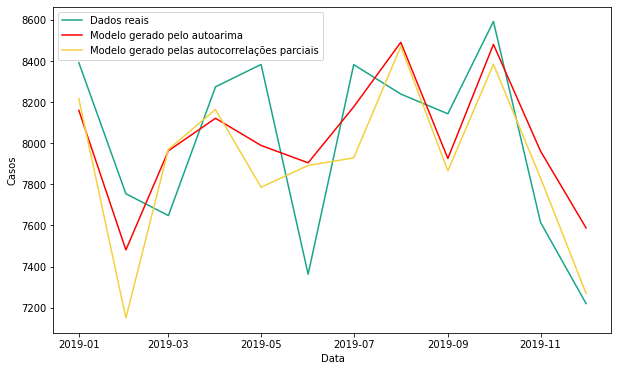

In [ ]:
#Previsão para 1 ano (12 meses)
previsao_autoarima = modelo_autoarima.predict(12)

dados_teste_tuberculose["previsao_autoarima"] = previsao_autoarima
plt.figure(figsize=(10,6))
#sns.lineplot(x="Data", y="Casos", data=dados_treino_tuberculose)
sns.lineplot(x="Data", y="Casos", label='Dados reais', data=dados_teste_tuberculose, color='#17a589')
sns.lineplot(x="Data", y="previsao_autoarima", label = 'Modelo gerado pelo autoarima' ,data=dados_teste_tuberculose, color='red')
sns.lineplot(x="Data", y="previsao", label = 'Modelo gerado pelas autocorrelações parciais',data=dados_teste_tuberculose, color='#f4d03f' )

plt.legend()

Graficamente, fica difícil vizualizar qual dos dois modelos faz uma previsão melhor. Para isso, é necessário uma métrica de avaliação para comparação. A métrica que será utilizada é o Erro quadrático médio, que vai pegar a diferença dos dados reais e da previsão, e fazer o quadrado dessa previsão, e por fim tirar uma média de todos os valores. Quanto mais baixa essa métrica, é melhor.

In [ ]:
resultado_autoarima = mean_squared_error (dados_teste_tuberculose["Casos"], dados_teste_tuberculose["previsao_autoarima"])
resultado_arima = mean_squared_error (dados_teste_tuberculose["Casos"], dados_teste_tuberculose["previsao"])
print(f"Autoarima = {resultado_autoarima}")
print(f"Arima = {resultado_arima}")

Autoarima = 93378.93285752926
Arima = 131384.4418748081


**CONCLUSÃO:** Comparando os resultados dos modelos autoarima e arima, percebe-se que o modelo Autoarima se mostrou melhor, pois o mean_squared_error foi menor.

**2. Utilizando o modelo PROPHET:**

In [ ]:
modelo_profeta = Prophet(seasonality_mode="multiplicative")

mapa = {"Data":"ds", "Passageiros":"y" }
dados_treino_passageiros_profeta = dados_treino_passageiros[["Data", "Passageiros"]].rename(mapa, 
                                                                                            axis=1)

modelo_profeta_treinado = modelo_profeta.fit(dados_treino_passageiros_profeta)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# 12 representa os 12 meses, e a freq="M", M é de month.

futuro = modelo_profeta_treinado.make_future_dataframe(periods=12, freq="M")
futuro

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
139,1960-07-31
140,1960-08-31
141,1960-09-30
142,1960-10-31


In [ ]:
resultado_profeta = modelo_profeta_treinado.predict(futuro)
resultado_profeta

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,115.603966,91.142403,116.575674,115.603966,115.603966,-0.101135,-0.101135,-0.101135,-0.101135,-0.101135,-0.101135,0.0,0.0,0.0,103.912403
1,1949-02-01,117.275019,86.995484,112.002352,117.275019,117.275019,-0.154216,-0.154216,-0.154216,-0.154216,-0.154216,-0.154216,0.0,0.0,0.0,99.189377
2,1949-03-01,118.784358,106.912953,132.464136,118.784358,118.784358,0.002721,0.002721,0.002721,0.002721,0.002721,0.002721,0.0,0.0,0.0,119.107520
3,1949-04-01,120.455412,104.071926,129.443743,120.455412,120.455412,-0.033256,-0.033256,-0.033256,-0.033256,-0.033256,-0.033256,0.0,0.0,0.0,116.449565
4,1949-05-01,122.072561,106.869079,131.912131,122.072561,122.072561,-0.027357,-0.027357,-0.027357,-0.027357,-0.027357,-0.027357,0.0,0.0,0.0,118.733027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-07-31,464.860836,571.415919,597.530230,464.124965,465.631254,0.257393,0.257393,0.257393,0.257393,0.257393,0.257393,0.0,0.0,0.0,584.512761
140,1960-08-31,467.660516,474.578417,499.864091,466.743678,468.603176,0.041049,0.041049,0.041049,0.041049,0.041049,0.041049,0.0,0.0,0.0,486.857711
141,1960-09-30,470.369885,414.536441,439.348272,469.283185,471.467568,-0.091353,-0.091353,-0.091353,-0.091353,-0.091353,-0.091353,0.0,0.0,0.0,427.400268
142,1960-10-31,473.169565,361.085827,387.311099,471.890611,474.471003,-0.210581,-0.210581,-0.210581,-0.210581,-0.210581,-0.210581,0.0,0.0,0.0,373.529040


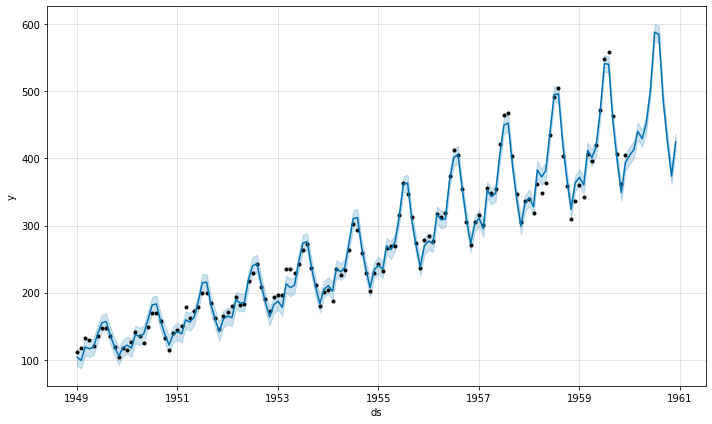

In [ ]:
#linha azul representa a previsão (yhat)
# Intervalo de confiança são os dados das colunas "yhat_lower" e #yhat_upper
# Os pontos pretos representam os dados reais

modelo_profeta_treinado.plot(resultado_profeta);

###<font color="darkturquoise"> **Desafio 13: Variar os parâmetros max_p(d,q) para ver se varia o *best_model* nos dados de tuberculose** 

In [ ]:
modelo_autoarima_with_max_pdq = auto_arima(dados_treino_tuberculose["Casos"].values,error_action="ignore",
                                       trace=True,seasonal=True,m=12,
                                        max_p=12,max_q=12,max_d=12)

modelo_autoarima_with_max_pdq

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.21 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.22 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=1.99 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.20 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=1.14 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=2.32 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=0.90 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.79 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

Mesmo acrescentando o parâmetro max (p,d,q) o best_model continuou igual. 

###<font color="darkturquoise"> **Desafio 14: Testar vários parâmetros para os dados de Hanseníase, passageiros e COVID.**

Para não ter que ficar repetindo o modelo autoarima, vou criar uma função para facilitar:

In [ ]:
def plot_previsao_with_autoarima(dados_treino, dados_teste, y, steps=12):
  modelo_autoarima = auto_arima(dados_treino[y].values, error_action="ignore", 
                               trace=True, seasonal=True, m=12)
                               
  previsao_autoarima = modelo_autoarima.predict(steps)

  aux = dados_teste.copy()
  aux["previsao"] = previsao_autoarima

  plt.figure(figsize=(10,6))
  sns.lineplot(x=dados_treino["Data"], y=dados_treino[y], data=dados_treino)
  sns.lineplot(x=dados_teste["Data"], y=dados_teste[y], data=dados_teste)
  sns.lineplot(x=aux["Data"], y=aux["previsao"], data=dados_teste)
  plt.show()

1. Testando parâmetros para dados de **Passageiros**

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.45 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.32 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.42 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.61 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.33 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.62 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.15 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.46 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

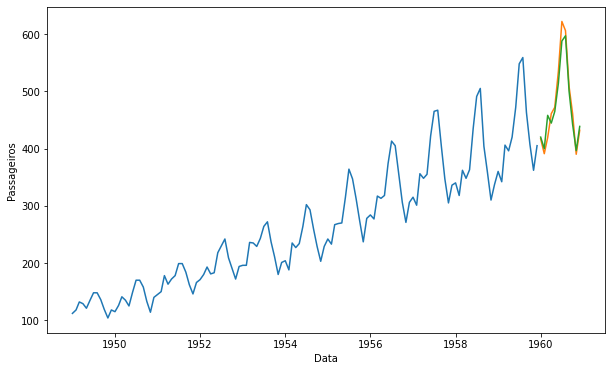

In [ ]:
plot_previsao_with_autoarima(dados_treino_passageiros, dados_teste_passageiros,y="Passageiros")

2. Testando parâmetros para dados de **Hanseníase**

In [ ]:
dados_st_hanseniase = dados_st_hanseniase[["data", "casos"]]
dados_st_hanseniase

,data,casos
0,2001-01-01,4107
1,2001-02-01,4103
2,2001-03-01,4787
3,2001-04-01,4135
4,2001-05-01,4724
...,...,...
223,2019-08-01,3107
224,2019-09-01,3060
225,2019-10-01,3137
226,2019-11-01,2715


In [ ]:
# Extraindo o mês e ano da data através do dt (datetime) e criando uma nova coluna chamada Mês e Ano.

dados_st_hanseniase["Mês"] = dados_st_hanseniase["data"].dt.month
dados_st_hanseniase["Ano"] = dados_st_hanseniase["data"].dt.year
dados_st_hanseniase.head()

,data,casos,Mês,Ano
0,2001-01-01,4107,1,2001
1,2001-02-01,4103,2,2001
2,2001-03-01,4787,3,2001
3,2001-04-01,4135,4,2001
4,2001-05-01,4724,5,2001


In [ ]:
dados_st_hanseniase.columns = ['Data', 'Casos', 'Mês', 'Ano']
dados_st_hanseniase

,Data,Casos,Mês,Ano
0,2001-01-01,4107,1,2001
1,2001-02-01,4103,2,2001
2,2001-03-01,4787,3,2001
3,2001-04-01,4135,4,2001
4,2001-05-01,4724,5,2001
...,...,...,...,...
223,2019-08-01,3107,8,2019
224,2019-09-01,3060,9,2019
225,2019-10-01,3137,10,2019
226,2019-11-01,2715,11,2019


In [ ]:
#Fazendo a previsão com os dados de hanseníase

dados_treino_hanseniase = dados_st_hanseniase.query("Ano!=2019")
dados_teste_hanseniase = dados_st_hanseniase.query("Ano == 2019")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3141.958, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3297.811, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3188.164, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3188.798, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3295.873, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=4.38 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=3229.028, Time=0.53 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.63 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=3.76 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=4.70 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=3131.289, Time=1.

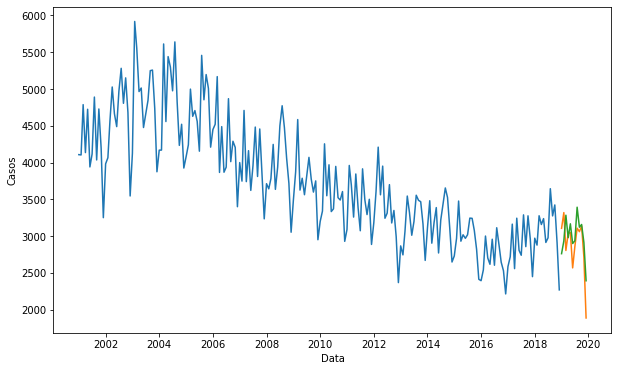

In [ ]:
plot_previsao_with_autoarima(dados_treino_hanseniase, dados_teste_hanseniase,y="Casos")

###<font color="darkturquoise"> **Desafio 15: Plotar os valores reais e valores previstos pelo "profeta". Fazer a mesma análise para os dados de tuberculose**

Análise Prophet para os casos de **TUBERCULOSE**

In [ ]:
modelo_profeta = Prophet()
#modelo_profeta = Prophet(seasonality_mode='multiplicative')

mapa = {'Data':'ds', 'Casos': 'y'}
dados_treino_tuberculose_profeta = dados_treino_tuberculose[['Data', 'Casos']].rename(mapa, axis=1)
modelo_profeta_treinado_tuberculose = modelo_profeta.fit(dados_treino_tuberculose_profeta)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro_tuberculose = modelo_profeta_treinado_tuberculose.make_future_dataframe(periods=12, freq='M')
resultado_profeta_tuberculose = modelo_profeta_treinado_tuberculose.predict(futuro_tuberculose)
resultado_profeta_tuberculose

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2001-01-01,7677.431620,7364.235129,8315.769647,7677.431620,7677.431620,0.021426,0.021426,0.021426,0.021426,0.021426,0.021426,0.0,0.0,0.0,7841.925017
1,2001-02-01,7674.773971,6435.155624,7384.473034,7674.773971,7674.773971,-0.099979,-0.099979,-0.099979,-0.099979,-0.099979,-0.099979,0.0,0.0,0.0,6907.458238
2,2001-03-01,7672.373514,7782.711144,8711.648382,7672.373514,7672.373514,0.075545,0.075545,0.075545,0.075545,0.075545,0.075545,0.0,0.0,0.0,8251.985125
3,2001-04-01,7669.715865,7270.843851,8227.232347,7669.715865,7669.715865,0.014073,0.014073,0.014073,0.014073,0.014073,0.014073,0.0,0.0,0.0,7777.648893
4,2001-05-01,7667.143946,7305.943791,8193.212639,7667.143946,7667.143946,0.012142,0.012142,0.012142,0.012142,0.012142,0.012142,0.0,0.0,0.0,7760.241704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2019-07-31,7843.214052,7540.717939,8412.533337,7837.851790,7848.746417,0.018249,0.018249,0.018249,0.018249,0.018249,0.018249,0.0,0.0,0.0,7986.347122
224,2019-08-31,7855.461529,7375.611484,8329.819241,7848.865980,7862.450551,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.0,0.0,0.0,7859.591875
225,2019-09-30,7867.313926,7848.071061,8744.014588,7859.442633,7875.630494,0.055514,0.055514,0.055514,0.055514,0.055514,0.055514,0.0,0.0,0.0,8304.062207
226,2019-10-31,7879.561403,7194.422830,8115.424151,7870.414075,7889.604232,-0.027867,-0.027867,-0.027867,-0.027867,-0.027867,-0.027867,0.0,0.0,0.0,7659.985529


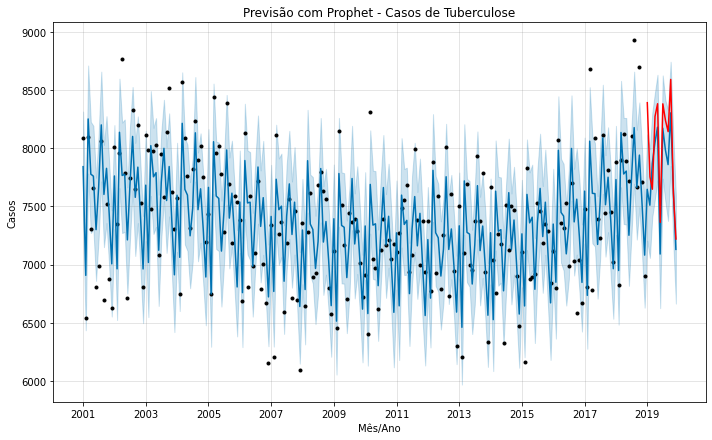

In [ ]:
fig = modelo_profeta_treinado_tuberculose.plot(resultado_profeta_tuberculose, ylabel='Casos', xlabel='Mês/Ano')
fig.axes[0].plot('Data', 'Casos', data=dados_teste_tuberculose, color='red')
plt.title('Previsão com Prophet - Casos de Tuberculose')
plt.show()